In [1]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
import sys
from sklearn.model_selection import train_test_split    
import  matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
import random
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from IPython.core.display import display, HTML
import base64
from facets_overview.generic_feature_statistics_generator import GenericFeatureStatisticsGenerator
import shap
import seaborn as sns

C:\Users\makis\anaconda3\envs\ai\lib\site-packages\ipykernel\parentpoller.py:113: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("../stroke-data.csv")

In [4]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df = df.drop('id',axis=1)

In [6]:
import ipyfacets as facets


In [7]:
facets.overview({'train':df})

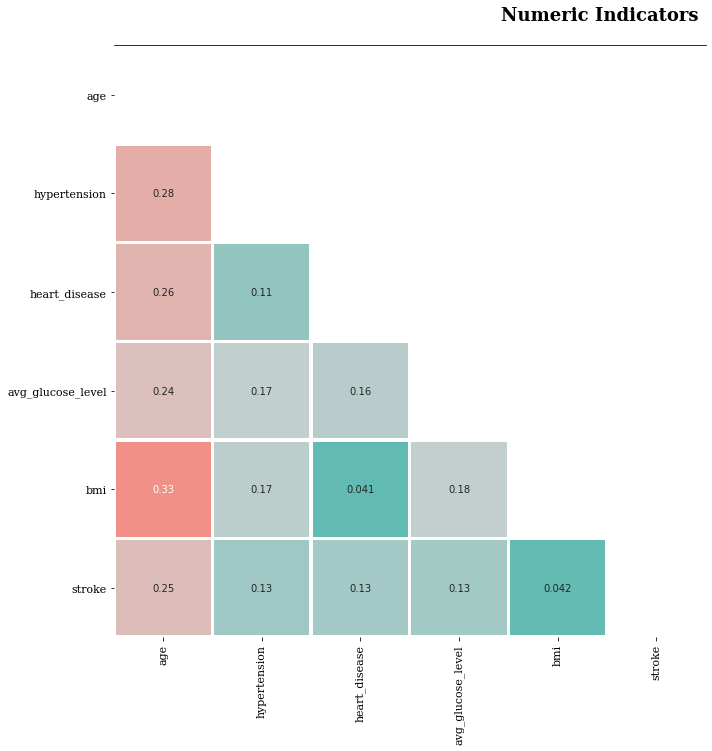

In [8]:
import matplotlib
corr_df = df

#background_color = "#fbfbfb"
#fig.patch.set_facecolor(background_color) # figure background color

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
#ax.set_facecolor(background_color) 
corr = corr_df.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

colors = ["#45b5aa","lightgray", "#ff6f61"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

sns.heatmap(corr, 
            square=True, 
            mask=mask,
            linewidth=2.5, 
            vmax=0.4, vmin=0, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)

ax.set_yticklabels(ax.get_xticklabels(), fontfamily='serif', rotation = 0, fontsize=11)
ax.set_xticklabels(ax.get_xticklabels(), fontfamily='serif', rotation=90, fontsize=11)

ax.spines['top'].set_visible(True)

fig.text(0.97, 1.02, 'Numeric Indicators', fontweight='bold', fontfamily='serif', fontsize=18, ha='right')    


plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

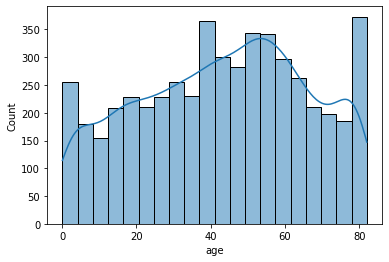

In [9]:
sns.histplot(df['age'],kde=True)

In [10]:
d = GenericFeatureStatisticsGenerator()

In [11]:
proto = d.ProtoFromDataFrames([{'name':'data','table':df}])

In [12]:

protostr = base64.b64encode(proto.SerializeToString()).decode("utf-8")
HTML_TEMPLATE = """

<link rel="import" href="/nbextensions/facets-dist/facets-jupyter.html" >
        <facets-overview id="elem"></facets-overview>
        <script>
          document.querySelector("#elem").protoInput = "{protostr}";
        </script>"""
html = HTML_TEMPLATE.format(protostr=protostr)
display(HTML(html))

In [13]:
datamod =pd.get_dummies(df,columns=['work_type','smoking_status','gender'])

In [14]:
datamod['Residence_type']= datamod['Residence_type'].replace('Urban',0)
datamod['Residence_type']= datamod['Residence_type'].replace('Rural',1)
# datamod['gender'] = datamod['gender'].replace('Male',0)
# datamod['gender'] = datamod['gender'].replace('Female',1)
datamod['ever_married'] =  datamod['ever_married'].replace('Yes',1)
datamod['ever_married'] = datamod['ever_married'].replace('No',0)

In [15]:
datamod['bmi']= datamod['bmi'].fillna(0)

In [16]:
sns.heatmap(datamod, 
            square=True, 
           
            linewidth=2.5, 
            vmax=0.4, vmin=0, 
            cmap=cmap, 
            cbar=False, 
            ax=ax,annot=True)
plt.tight_layout()
plt.show()

<Figure size 432x288 with 0 Axes>

In [17]:
datamod = datamod[['age','gender_Male','gender_Female','gender_Other','hypertension','heart_disease','ever_married','Residence_type','avg_glucose_level','bmi','work_type_Govt_job','work_type_Never_worked','work_type_Private','work_type_Self-employed','work_type_children','smoking_status_Unknown','smoking_status_formerly smoked','smoking_status_never smoked','smoking_status_smokes','stroke']]

In [18]:
datamod

,age,gender_Male,gender_Female,gender_Other,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,67.0,1,0,0,0,1,1,0,228.69,36.6,0,0,1,0,0,0,1,0,0,1
1,61.0,0,1,0,0,0,1,1,202.21,0.0,0,0,0,1,0,0,0,1,0,1
2,80.0,1,0,0,0,1,1,1,105.92,32.5,0,0,1,0,0,0,0,1,0,1
3,49.0,0,1,0,0,0,1,0,171.23,34.4,0,0,1,0,0,0,0,0,1,1
4,79.0,0,1,0,1,0,1,1,174.12,24.0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,0,1,0,1,0,1,0,83.75,0.0,0,0,1,0,0,0,0,1,0,0
5106,81.0,0,1,0,0,0,1,0,125.20,40.0,0,0,0,1,0,0,0,1,0,0
5107,35.0,0,1,0,0,0,1,1,82.99,30.6,0,0,0,1,0,0,0,1,0,0
5108,51.0,1,0,0,0,0,1,1,166.29,25.6,0,0,1,0,0,0,1,0,0,0


# Data Smote

In [19]:

Y = datamod['stroke']
X = (pd.DataFrame(datamod.drop('stroke',axis=1)))


In [20]:
sm = SMOTE()

In [21]:
X_sm,Y_sm = sm.fit_resample(X,Y)

In [22]:
X_sm

,age,gender_Male,gender_Female,gender_Other,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.000000,1,0,0,0,1,1,0,228.690000,36.600000,0,0,1,0,0,0,1,0,0
1,61.000000,0,1,0,0,0,1,1,202.210000,0.000000,0,0,0,1,0,0,0,1,0
2,80.000000,1,0,0,0,1,1,1,105.920000,32.500000,0,0,1,0,0,0,0,1,0
3,49.000000,0,1,0,0,0,1,0,171.230000,34.400000,0,0,1,0,0,0,0,0,1
4,79.000000,0,1,0,1,0,1,1,174.120000,24.000000,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9717,71.773742,0,1,0,0,0,1,0,209.276907,37.224442,0,0,1,0,0,1,0,0,0
9718,50.373806,0,1,0,0,0,1,1,167.087281,30.675716,0,0,0,0,0,0,0,0,0
9719,72.078067,0,1,0,0,0,1,0,75.623067,25.542937,0,0,0,1,0,0,0,0,0
9720,77.565386,0,1,0,0,0,1,0,67.614874,24.295770,0,0,1,0,0,0,0,1,0


In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X_sm,Y_sm , test_size=0.2)

In [24]:
X_train.shape

(7777, 19)

# Random forest

In [25]:
forest = RandomForestClassifier(n_estimators=500)

In [26]:
train_data = forest.fit(X_train,Y_train)

## forest.fit(X_train,Y_train)

In [27]:
predictions = forest.predict(X_test)

In [28]:
prob = forest.predict_proba(X_test)

In [29]:
metrics.accuracy_score(y_pred=predictions,y_true=Y_test)

0.9717223650385605

Text(0.5, 0, 'Importance of each feature')

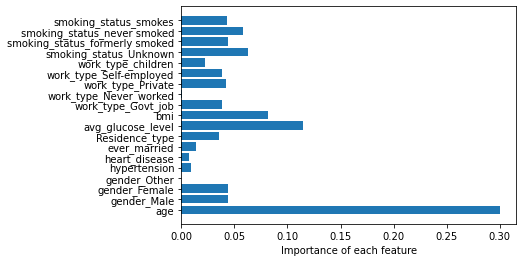

In [30]:
plt.barh(datamod.columns.drop('stroke'), forest.feature_importances_)
plt.xlabel("Importance of each feature")


In [31]:
X_test_frame= pd.DataFrame(data=X_test,columns=datamod.columns.drop('stroke'))

In [32]:
explainer = shap.TreeExplainer(forest)

In [33]:
values= explainer.shap_values(X_test)

In [34]:
list(explainer.expected_value),

([0.4993948823453775, 0.5006051176546227],)

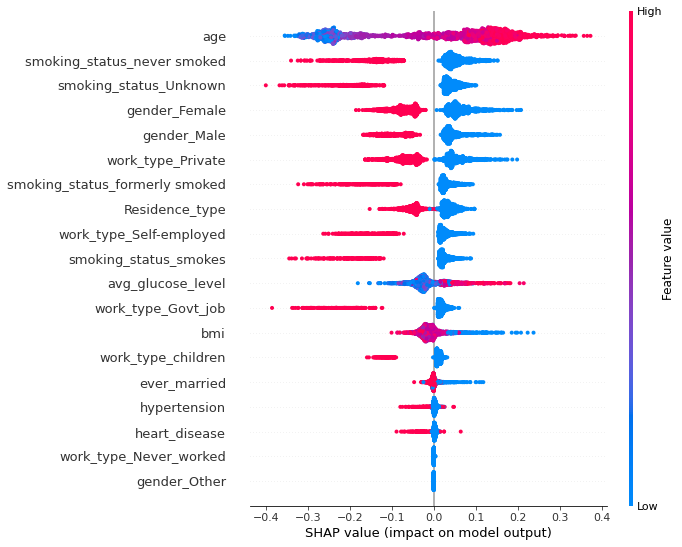

In [35]:
shap.summary_plot(values[1],X_test)

In [36]:
shap.initjs()

In [37]:
shap.force_plot(explainer.expected_value[1],values[1], X_test_frame)


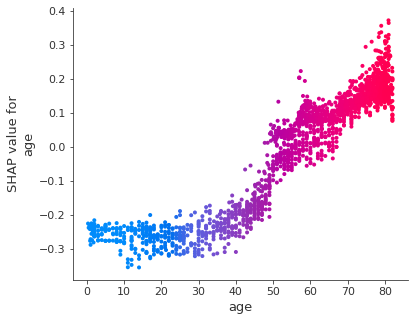

In [38]:
shap.dependence_plot('age',values[1],X_test,interaction_index="age")

# Test data

In [43]:
data = np.array([62,1,0,0,0,0,1,1,100,28,0,0,0,1,0,0,0,1,0]).reshape(1,-1)

In [44]:
forest.predict(data)

array([0], dtype=int64)